# FINM 250 - TA Review 2 - Linear Regression
## Tobias

## 0. Agenda:
### 1. Linear Regression
### 2. Risk Metrics
### 3. Python Fun

## 1. So, what is Linear Regression?

Linear regression is an **extremely** powerful statistical tool that allows us to model the relationship between a dependent variable and one or more independent variables. I'm sure many of you have seen the concept of a "line of best fit"; this is exactly what linear regression is doing.

The canonical form of a linear regression model is:

$$\boldsymbol{y} = \boldsymbol{\beta} \boldsymbol{X} + \epsilon$$

Note that the **bold** font indicates matrices/vectors. In particular, the defining feature of a linear regression is that it is linear in the parameters $\boldsymbol{\beta}$ and $\boldsymbol{c}$, not necessarily the independent variables $\boldsymbol{X}$. That is, $\boldsymbol{X}$ could be:

- quantitative inputs
- transforms of quantitative inputs (log, square-root, cosine, etc.)
- basis expansions (polynomials, splines, etc.)
- categorical inputs (one-hot encoding, etc.)
- interactions of the above

Thus, although the model is linear in the parameters, it can be highly non-linear in the inputs. This is part of the reason why linear regression is so powerful. An OLS (ordinary least squares) linear regression model is one that minimizes the sum of squared residuals:

$$
\hat{\beta} = \arg \min_\beta \sum_{i=1}^{N}\left(y_i - \beta_0 - \sum_{j=1}^{p}x_{i,j}\beta_j\right)^2
$$

You will also see closed-form solutions for OLS:

$$
\hat{\boldsymbol{\beta}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}
$$

and 

$$
\beta_i = \frac{\sum_{i=1}^{N}\left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sum_{i=1}^{N}\left(x_i - \bar{x}\right)^2} = \frac{\text{Cov}(x, y)}{\text{Var}(x)}
$$

$$
\alpha = \bar{y} - \beta\bar{x}
$$

We need some assumptions to hold for OLS to work:

- **Linearity**: the relationship between the dependent variable and the independent variables is linear in the parameters.
- **Independence**: the residuals are independent of each other (sometimes called (strict) exogeneity).
- **Normality**: the residuals are normally distributed ($\epsilon \sim N(0, \sigma^2)$).
- **Homoscedasticity/no autocorrelation**: the variance of the residuals is constant (also called the "no heteroscadasticity" assumption).
- **No multicollinearity**: the independent variables are not too highly correlated with each other in space or time.

There are many resources to learn more about linear regression. I recommend the following:

- Hayashi's Econometrics: [Chapter 1](https://daniellecarusi.files.wordpress.com/2009/07/s6946.pdf)
- Elements of Statistical Learning: [Chapter 3](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf)
- Pattern Recognition and Machine Learning: [Chapter 3](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)
- Introduction to Statistical Learning: [Chapter 3](https://hastie.su.domains/ISLP/ISLP_website.pdf)

- [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
- Khan Academy: [any of his videos are good](https://www.youtube.com/watch?v=yMgFHbjbAW8)
- [Statsmodels](https://www.statsmodels.org/stable/regression.html)
- [Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html)
- Most articles or videos that you can find online are good.

Note that this covers a wide span of difficulties; this review alone mostly suffices for this class. The other resources are for those who want to learn more.

Linear regression appears in virtually all disciplines, and finance is no exception. It is used in:
- Hedging
- Replication
- Asset pricing
- Time Series (AR, ARMA, ARIMA, etc.)

Some interview questions you might get:

- Give the closed form solution for linear regression and the residuals.
- What happens to the betas, intercept, and R^2 if there is some measurement error in your X variables? What about Y?
- How do I determine if my betas are statistically significant?
- When would you want to use a weighted regression? What about a robust regression?
- What is the difference between a linear regression and a logistic regression? What is the canonical link function for a logistic regression?
- What is the closed form solution for a logistic regression? And Ridge regression?
- What is the difference between Ridge and LASSO regression?
- How would you determine if your regression is overfitting (to outliers)? And how would you fix it?

### 1.1. Linearity

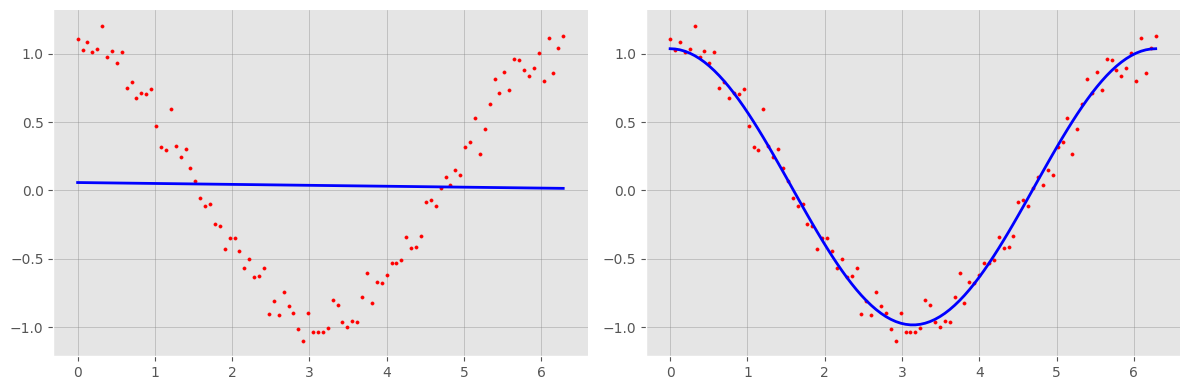

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

p = plt.rcParams

plt.style.use("ggplot")
p["axes.spines.right"] = False
p["axes.spines.top"] = False
p["font.weight"] = "light"
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5
p["grid.alpha"] = 0.5
p["axes.spines.top"] = False
p["axes.spines.right"] = False

x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x) + np.random.normal(0, 0.1, 100)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(x, y, color="red", s=5)

regr = sm.OLS(y, sm.add_constant(x)).fit()
axes[0].plot(x, regr.predict(sm.add_constant(x)), color="blue", linewidth=2)
x_cos = np.cos(x)

regr_inv = sm.OLS(y, sm.add_constant(x_cos)).fit()
axes[1].scatter(x, y, color="red", s=5)
axes[1].plot(x, regr_inv.predict(sm.add_constant(x_cos)), color="blue", linewidth=2)
fig.tight_layout()

We see that by taking $\cos(x)$, we are able to fit it perfectly with a linear regression model. This is because the model is linear in the parameters, not necessarily the inputs. Note that in fields like economics, taking $\log(x)$ is a common transformation.

This is a good time to talk about how we interpret a linear regression model. The main things we are interested in are the intercepts, the betas, and the R^2.

The intercept is the value of the dependent variable when all of the independent variables are 0. Note that in the general case they are not particularly intuitive.

The slope ($\beta$) is the change in the dependent variable for a 1 unit change in the independent variable. In particular, we will see in the homework that this tells us the hedge ratios and replicating portfolios for a linear regression model.

The $r^2$, defined as:

$$
r^2 = 1 - \frac{\sum_{i=1}^{N}\left(y_i - \hat{y}_i\right)^2}{\sum_{i=1}^{N}\left(y_i - \bar{y}\right)^2} = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

Tells us the proportion of the variance in the dependent variable that is explained by the independent variables. Note that this is not the same as correlation.

### 1.2. Independence (Exogeneity)

This is a *very* strong assumption:

$$
\mathbb{E}[\epsilon_i | \boldsymbol{X}] = 0 \leftrightarrow \mathbb{E}[\epsilon_i | \boldsymbol{x}_1 , \dots, \boldsymbol{x}_n] = 0
$$

Some cases where this assumption is violated:
- The case above in the left plot! If $x \leq \frac{\pi}{2}$, then we expect $\epsilon > 0$, and if $\frac{\pi}{2} < x < \frac{3\pi}{2}$ then $\epsilon < 0$

A more realistic example is the following:

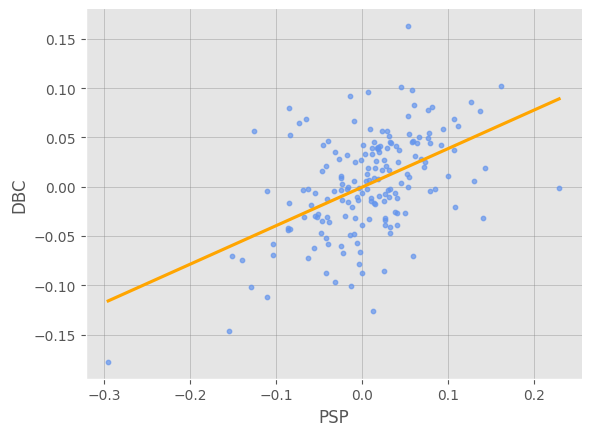

In [2]:
import pandas as pd
etfs = pd.read_excel("finm-portfolio-2023/data/multi_asset_etf_data.xlsx", sheet_name="excess returns", index_col=0, parse_dates=[0])

sns.regplot(data=etfs, x="PSP", y="DBC", ci=None, color="orange", scatter_kws={"s": 10, "alpha": 0.7, "color": "cornflowerblue"});

See how the residuals for the negative part of the quadrant are consistently negative? This is a violation of the independence assumption. Though, this one is quite hard to fix.

Another good example is from Hayashi's Econometrics, where *all* lagged regressions fail this assumption. Consider an AR(1) model:

$$
y_t = \beta y_{t-1} + \epsilon_t
$$

Then, suppose for the sake of contradiction it holds. Then $\mathbb{E}[y_{t-1}\epsilon_i] = 0$, so:

\begin{align*}
\mathbb{E}[y_{t-1}\epsilon_i] &= \mathbb{E}[(\beta y_{i-1} + \epsilon_{i})\epsilon_i]\\
&= \beta \mathbb{E}[y_{i-1}\epsilon_i] + \mathbb{E}[\epsilon_{i}^2]\\
&= \mathbb{E}[\epsilon_{i}^2]
\end{align*}
Thus unless $\mathbb{E}[\epsilon_{i}^2] = 0$, ie. we have no errors, we have a contradiction.

We can weaken this (as we shall see).

### 1.3. Multicollinearity

This is a very common problem in finance.

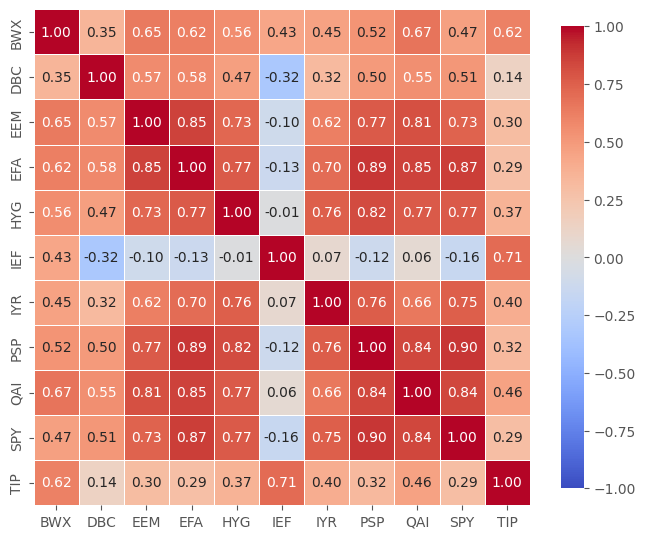

In [3]:
def plot_correlation_matrix(corrs, ax=None):
    # Correlation helper function.
    return sns.heatmap(
        corrs,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        linewidths=0.7,
        annot_kws={"size": 10},
        fmt=".2f",
        square=True,
        cbar_kws={"shrink": 0.75},
        ax=ax,
    )

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_correlation_matrix(etfs.corr(), ax);

It's bright red!

Think about all the problems that can arise from this. For example, if we have two variables that are highly correlated, then we can't really tell which one is causing the other. This is a problem in finance, where we want to know what is causing what, and what assets to hold to replicate or hedge.

We also get numerical stability issues:

$$
(X^TX)^{-1}
$$

What happens when $X^TX$ is close to singular? Then we get a very large variance in our estimates (like we saw with MV optimization).

We do have some ways to deal with this, though. We can use PCA to reduce the dimensionality of the problem, we can use regularization, or we can use covariance shrinkage.

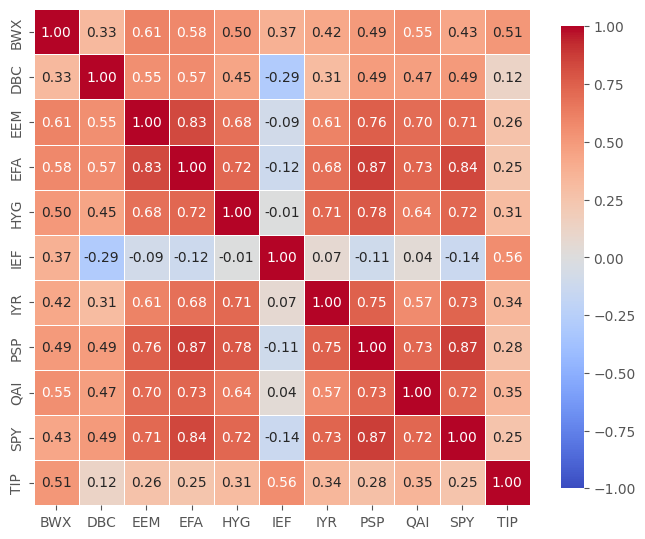

In [4]:
# Use a shrinkage estimator.
from sklearn.covariance import LedoitWolf

lw = LedoitWolf()
lw.fit(etfs)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Turn covariance into correlation matrix.
lw_corr = lw.covariance_ / np.outer(np.sqrt(lw.covariance_.diagonal()), np.sqrt(lw.covariance_.diagonal()))
lw_corr = pd.DataFrame(lw_corr, index=etfs.columns, columns=etfs.columns)

# Kind of better?
plot_correlation_matrix(lw_corr, ax);

### 1.4. Normality and Homoscedasticity

This assumption states that:

$$
\epsilon \sim (0, \sigma^2)
$$

And, if we get lucky and $\epsilon \sim N(0, \sigma^2)$, then:

$$
\hat{\beta} \sim N\left(\beta, \sigma^2\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\right)
$$

This is great because it allows us to get p-values for our coefficients, and we can do hypothesis testing. How do we test for normality? We can use a Q-Q plot, or a Shapiro-Wilk test.

Homoscedasticity is quite rare in these kinds of time-series. Why? Because volatility is not constant! Consider:

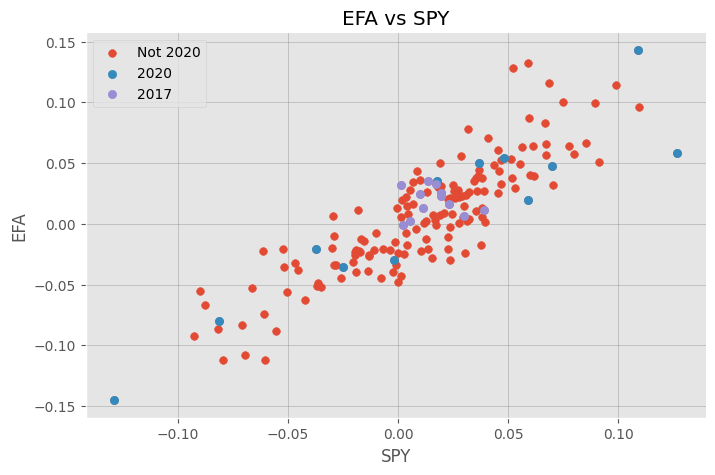

In [5]:
# Regress SPY on EFA
spy = etfs["SPY"]
efa = etfs["EFA"]
regr_spy = sm.OLS(efa, sm.add_constant(spy)).fit()

# Plot the residuals over time.
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(spy, efa, s=30, label="Not 2020")

# Get the returns for the year 2020
spy_2020 = spy.loc["2020"]
efa_2020 = efa.loc["2020"]

ax.scatter(spy_2020, efa_2020, s=35, label="2020")

# Get returns for 2017
spy_2017 = spy.loc["2017"]
efa_2017 = efa.loc["2017"]

ax.scatter(spy_2017, efa_2017, s=35, label="2017")
ax.legend()
ax.set_ylabel("EFA")
ax.set_xlabel("SPY")
ax.set_title("EFA vs SPY");

Remember from August, this is why we care a lot about GARCH and other voaltility models. These topics will likely (?) be explored further when we talk about prediction and momentum from the AQR case.

In [6]:
# Regress DBC on PSP
regr = sm.OLS(etfs["DBC"], sm.add_constant(etfs["PSP"])).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBC   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     55.81
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.92e-12
Time:                        15:43:01   Log-Likelihood:                 292.05
No. Observations:                 173   AIC:                            -580.1
Df Residuals:                     171   BIC:                            -573.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.003     -0.140      0.889      -0.007       0.006
PSP            0.3904      0.052      7.471      0.000       0.287       0.494
==============================================================================
Omnibus:                        1.867   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.554
Skew:                           0.080   Prob(JB):                        0.460
Kurtosis:                       3.436   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

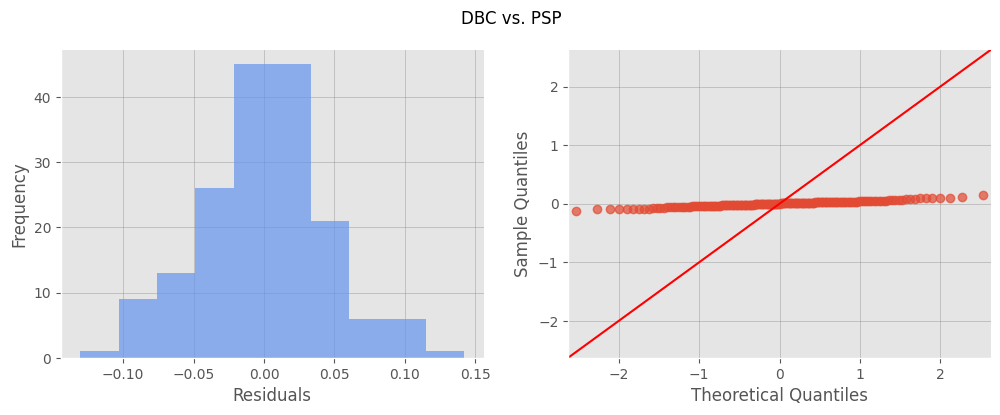

In [7]:
# Make a Q-Q plot of the residuals
# Disaster.

# Make a 1x2 figure
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the residuals as a histogram
axes[0].hist(regr.resid, bins=10, color="cornflowerblue", alpha=0.7)
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Frequency")

# Plot the residuals as a Q-Q plot
sm.qqplot(regr.resid, line="45", ax=axes[1], alpha=0.7)
fig.suptitle("DBC vs. PSP");

In [8]:
# Regress SPY on EFA
regr_2 = sm.OLS(etfs["EFA"], sm.add_constant(etfs["SPY"])).fit()
regr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EFA   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     540.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           7.75e-55
Time:                        15:43:01   Log-Likelihood:                 404.00
No. Observations:                 173   AIC:                            -804.0
Df Residuals:                     171   BIC:                            -797.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.002     -2.652      0.009      -0.009      -0.001
SPY            0.9797      0.042     23.255      0.000       0.897       1.063
==============================================================================
Omnibus:                        7.398   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                8.003
Skew:                           0.358   Prob(JB):                       0.0183
Kurtosis:                       3.773   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

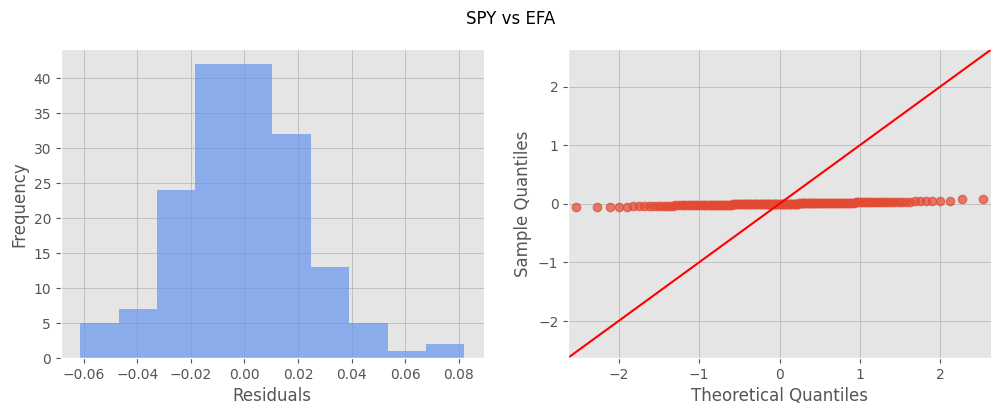

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(regr_2.resid, bins=10, color="cornflowerblue", alpha=0.7)
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Frequency")
sm.qqplot(regr_2.resid, line="45", ax=axes[1], alpha=0.7)
fig.suptitle("SPY vs EFA");

In [10]:
# Run Shapiro-Wilk test
from scipy.stats import shapiro
print(shapiro(regr.resid))
print(shapiro(regr_2.resid))

ShapiroResult(statistic=0.9912244081497192, pvalue=0.3714447319507599)
ShapiroResult(statistic=0.987383246421814, pvalue=0.12359387427568436)


Okay, so these residuals are definitely not normal. Do they at least have constant variance? Let's plot the residuals against the fitted values and run a Breusch-Pagan test.

PSP/DBC P-Value: 0.41
SPY/EFA P-Value: 0.05


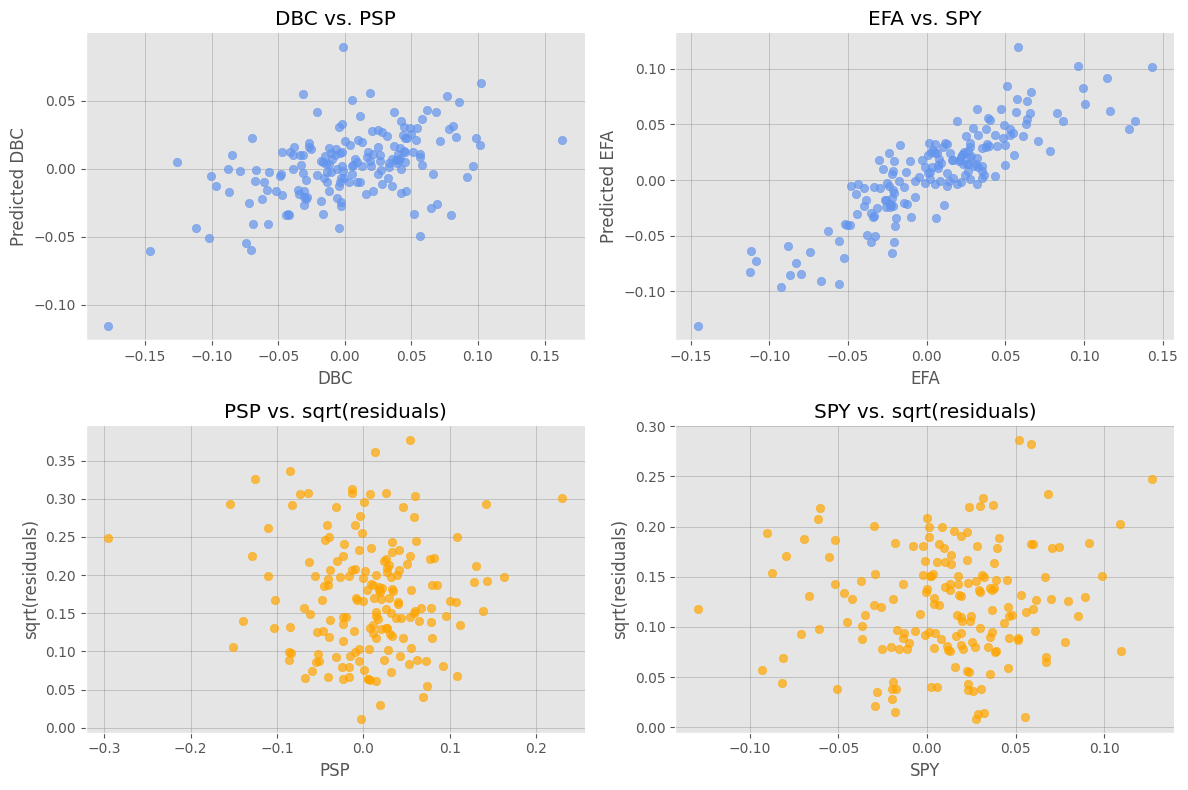

In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan
print(f'PSP/DBC P-Value: {het_breuschpagan(regr.resid, sm.add_constant(etfs["PSP"]))[3]:.2f}')
print(f'SPY/EFA P-Value: {het_breuschpagan(regr_2.resid, sm.add_constant(etfs["SPY"]))[3]:.2f}')

# Plot estimated ys against actual ys and sqrt of residuals.
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].scatter(etfs["DBC"], regr.predict(sm.add_constant(etfs["PSP"])), color="cornflowerblue", alpha=0.7)
axes[0, 0].set_title("DBC vs. PSP")
axes[0, 0].set_xlabel("DBC")
axes[0, 0].set_ylabel("Predicted DBC")
axes[0, 1].scatter(etfs["EFA"], regr_2.predict(sm.add_constant(etfs["SPY"])), color="cornflowerblue", alpha=0.7)
axes[0, 1].set_title("EFA vs. SPY")
axes[0, 1].set_xlabel("EFA")
axes[0, 1].set_ylabel("Predicted EFA")

axes[1, 0].scatter(etfs["PSP"], np.sqrt(np.abs(regr.resid)), color="orange", alpha=0.7)
axes[1, 0].set_title("PSP vs. sqrt(residuals)")
axes[1, 0].set_xlabel("PSP")
axes[1, 0].set_ylabel("sqrt(residuals)")

axes[1, 1].scatter(etfs["SPY"], np.sqrt(np.abs(regr_2.resid)), color="orange", alpha=0.7)
axes[1, 1].set_title("SPY vs. sqrt(residuals)")
axes[1, 1].set_xlabel("SPY")
axes[1, 1].set_ylabel("sqrt(residuals)")
fig.tight_layout()

So the conclusion is something like, SPY and EFA are probably a good hedge for each other, but PSP and DBC are not?

Note that non-constant variance means that OLS is no longer BLUE (best linear unbiased estimator). But, importantly, it is still unbiased.

There are a "zoo" of ways to tackle this: weighted least squares, generalized least squares, robust regression, etc. You can also play around with the loss functions and have regularization.

Some examples:
- Huber
- Tukey
- Ridge
- LASSO
- Elastic Net
- Weighted Least Squares
- Quantiles
- RANSAC (my personal favorite)

### 1.5. Fine-tuning the SPY-EFA hedge

There are a few ways to do this. The first and obvious improvement is to have a rolling window for $\beta$ (the regression) or some kind of weighting so that our $\beta$ changes over time.

However, why don't we look at which points are causing the most problems?

Cook's Distance:

$$
D_i = \frac{\sum_{j=1}^{N}\left(\hat{y}_j - \hat{y}_{j(i)}\right)^2}{p\mathit{MSE}}
$$

Where $\hat{y}_{j(i)}$ is the predicted value of $y_j$ when the $i$ th observation is deleted and $p$ is the number of features.

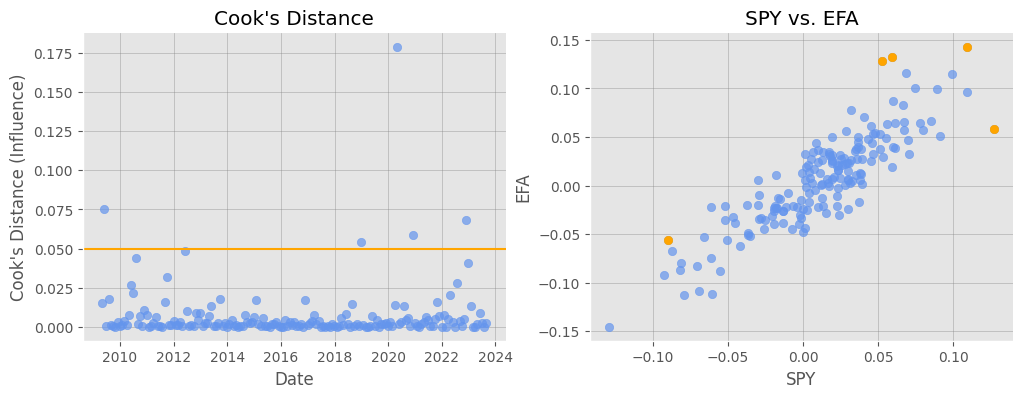

In [12]:
# Calculate cook's distance
from statsmodels.stats.outliers_influence import OLSInfluence
regr = sm.OLS(etfs["EFA"], sm.add_constant(etfs["SPY"])).fit()
influence = OLSInfluence(regr)

# Plot cook's distance
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(etfs.index, influence.cooks_distance[0], color="cornflowerblue", alpha=0.7);
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Cook's Distance (Influence)")
ax[0].axhline(0.05, color="orange")
ax[0].set_title("Cook's Distance");

# Highlight the outliers on the SPY vs. EFA scatter plot
ax[1].scatter(etfs["SPY"], etfs["EFA"], color="cornflowerblue", alpha=0.7)
ax[1].scatter(etfs["SPY"].loc[influence.cooks_distance[0] > 0.05], etfs["EFA"].loc[influence.cooks_distance[0] > 0.05], color="orange", alpha=1)
ax[1].set_xlabel("SPY")
ax[1].set_ylabel("EFA")
ax[1].set_title("SPY vs. EFA");

In [13]:
# Remove the outliers and re-run the regression
etfs_no_outliers = etfs.loc[influence.cooks_distance[0] < 0.05]
regr_no_outliers = sm.OLS(etfs_no_outliers["EFA"], sm.add_constant(etfs_no_outliers["SPY"])).fit()

print(f'Beta Vanilla: {regr.params[1]:.2f}')
print(f'Beta No Outliers: {regr_no_outliers.params[1]:.2f}')

Beta Vanilla: 0.98
Beta No Outliers: 0.98


Beta Vanilla: 0.98
Beta RANSAC: 1.05


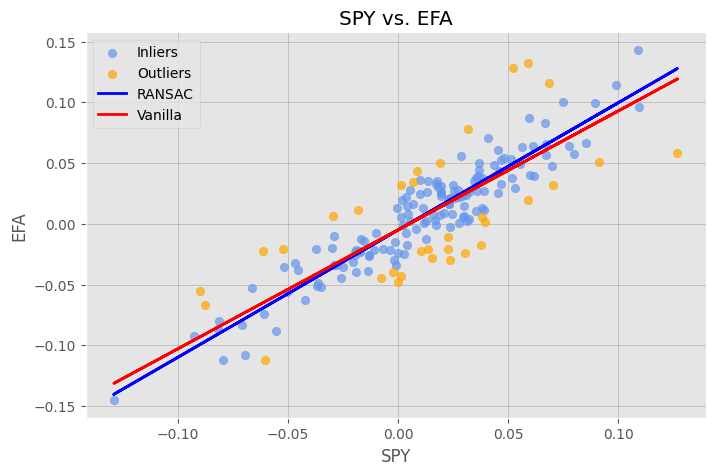

In [14]:
# Let's try something fun like RANSAC
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac = RANSACRegressor(estimator=LinearRegression(), max_trials=1000, random_state=1)
ransac.fit(etfs[["SPY"]], etfs["EFA"])
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(etfs["SPY"].loc[inlier_mask], etfs["EFA"].loc[inlier_mask], color="cornflowerblue", alpha=0.7, label="Inliers")
ax.scatter(etfs["SPY"].loc[outlier_mask], etfs["EFA"].loc[outlier_mask], color="orange", alpha=0.7, label="Outliers")
ax.plot(etfs["SPY"], ransac.predict(etfs[["SPY"]]), color="blue", linewidth=2, label="RANSAC")
ax.plot(etfs["SPY"], regr.predict(sm.add_constant(etfs["SPY"])), color="red", linewidth=2, label="Vanilla")
ax.legend()

ax.set_xlabel("SPY")
ax.set_ylabel("EFA")
ax.set_title("SPY vs. EFA")

print(f'Beta Vanilla: {regr.params[1]:.2f}')
print(f'Beta RANSAC: {ransac.estimator_.coef_[0]:.2f}')

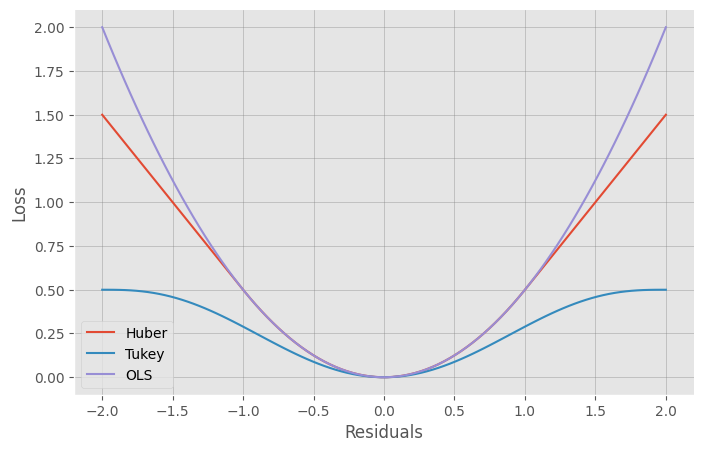

In [15]:
# We could also play around with the loss function.

# Plot huber loss function
x = np.linspace(-2, 2, 100)
y_hub = np.where(np.abs(x) < 1, 0.5 * x ** 2, np.abs(x) - 0.5)

# Plot tukey loss function
y_tuk = np.where(np.abs(x) <= 2, 0.5 * (1 - (1 - (np.abs(x) / 2) ** 2) ** 3), 0.5)


y_ols = 0.5 * x ** 2

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(x, y_hub, label="Huber")
ax.plot(x, y_tuk, label="Tukey")
ax.plot(x, y_ols, label="OLS")
ax.legend()
ax.set_xlabel("Residuals")
ax.set_ylabel("Loss");

Beta Vanilla: 0.98
Beta Huber: 0.97
Beta Tukey: 0.97


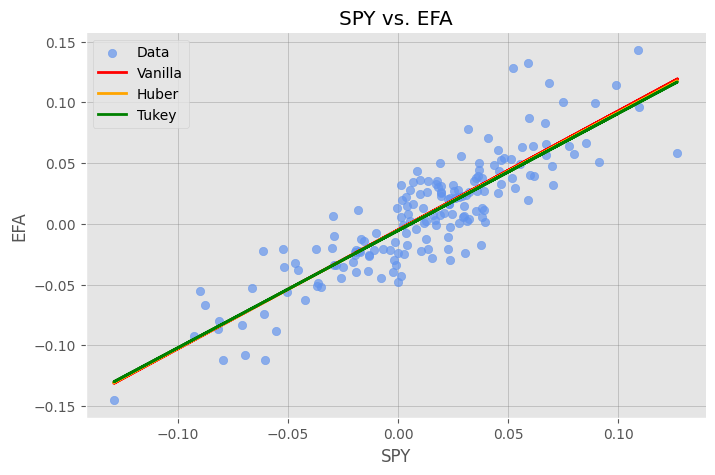

In [16]:
# Or Tukey and Huber.
from statsmodels.robust.robust_linear_model import RLM

huber = RLM(etfs["EFA"], sm.add_constant(etfs["SPY"]), M=sm.robust.norms.HuberT())
tukey = RLM(etfs["EFA"], sm.add_constant(etfs["SPY"]), M=sm.robust.norms.TukeyBiweight())

# Plot the results and compare to vanilla regression.
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(etfs["SPY"], etfs["EFA"], color="cornflowerblue", alpha=0.7, label="Data")
ax.plot(etfs["SPY"], regr.predict(sm.add_constant(etfs["SPY"])), color="red", linewidth=2, label="Vanilla")
ax.plot(etfs["SPY"], huber.fit().predict(sm.add_constant(etfs["SPY"])), color="orange", linewidth=2, label="Huber")
ax.plot(etfs["SPY"], tukey.fit().predict(sm.add_constant(etfs["SPY"])), color="green", linewidth=2, label="Tukey")
ax.legend()
ax.set_xlabel("SPY")
ax.set_ylabel("EFA")
ax.set_title("SPY vs. EFA")

# Print the betas
print(f'Beta Vanilla: {regr.params[1]:.2f}')
print(f'Beta Huber: {huber.fit().params[1]:.2f}')
print(f'Beta Tukey: {tukey.fit().params[1]:.2f}')

## 2. Risk Metrics

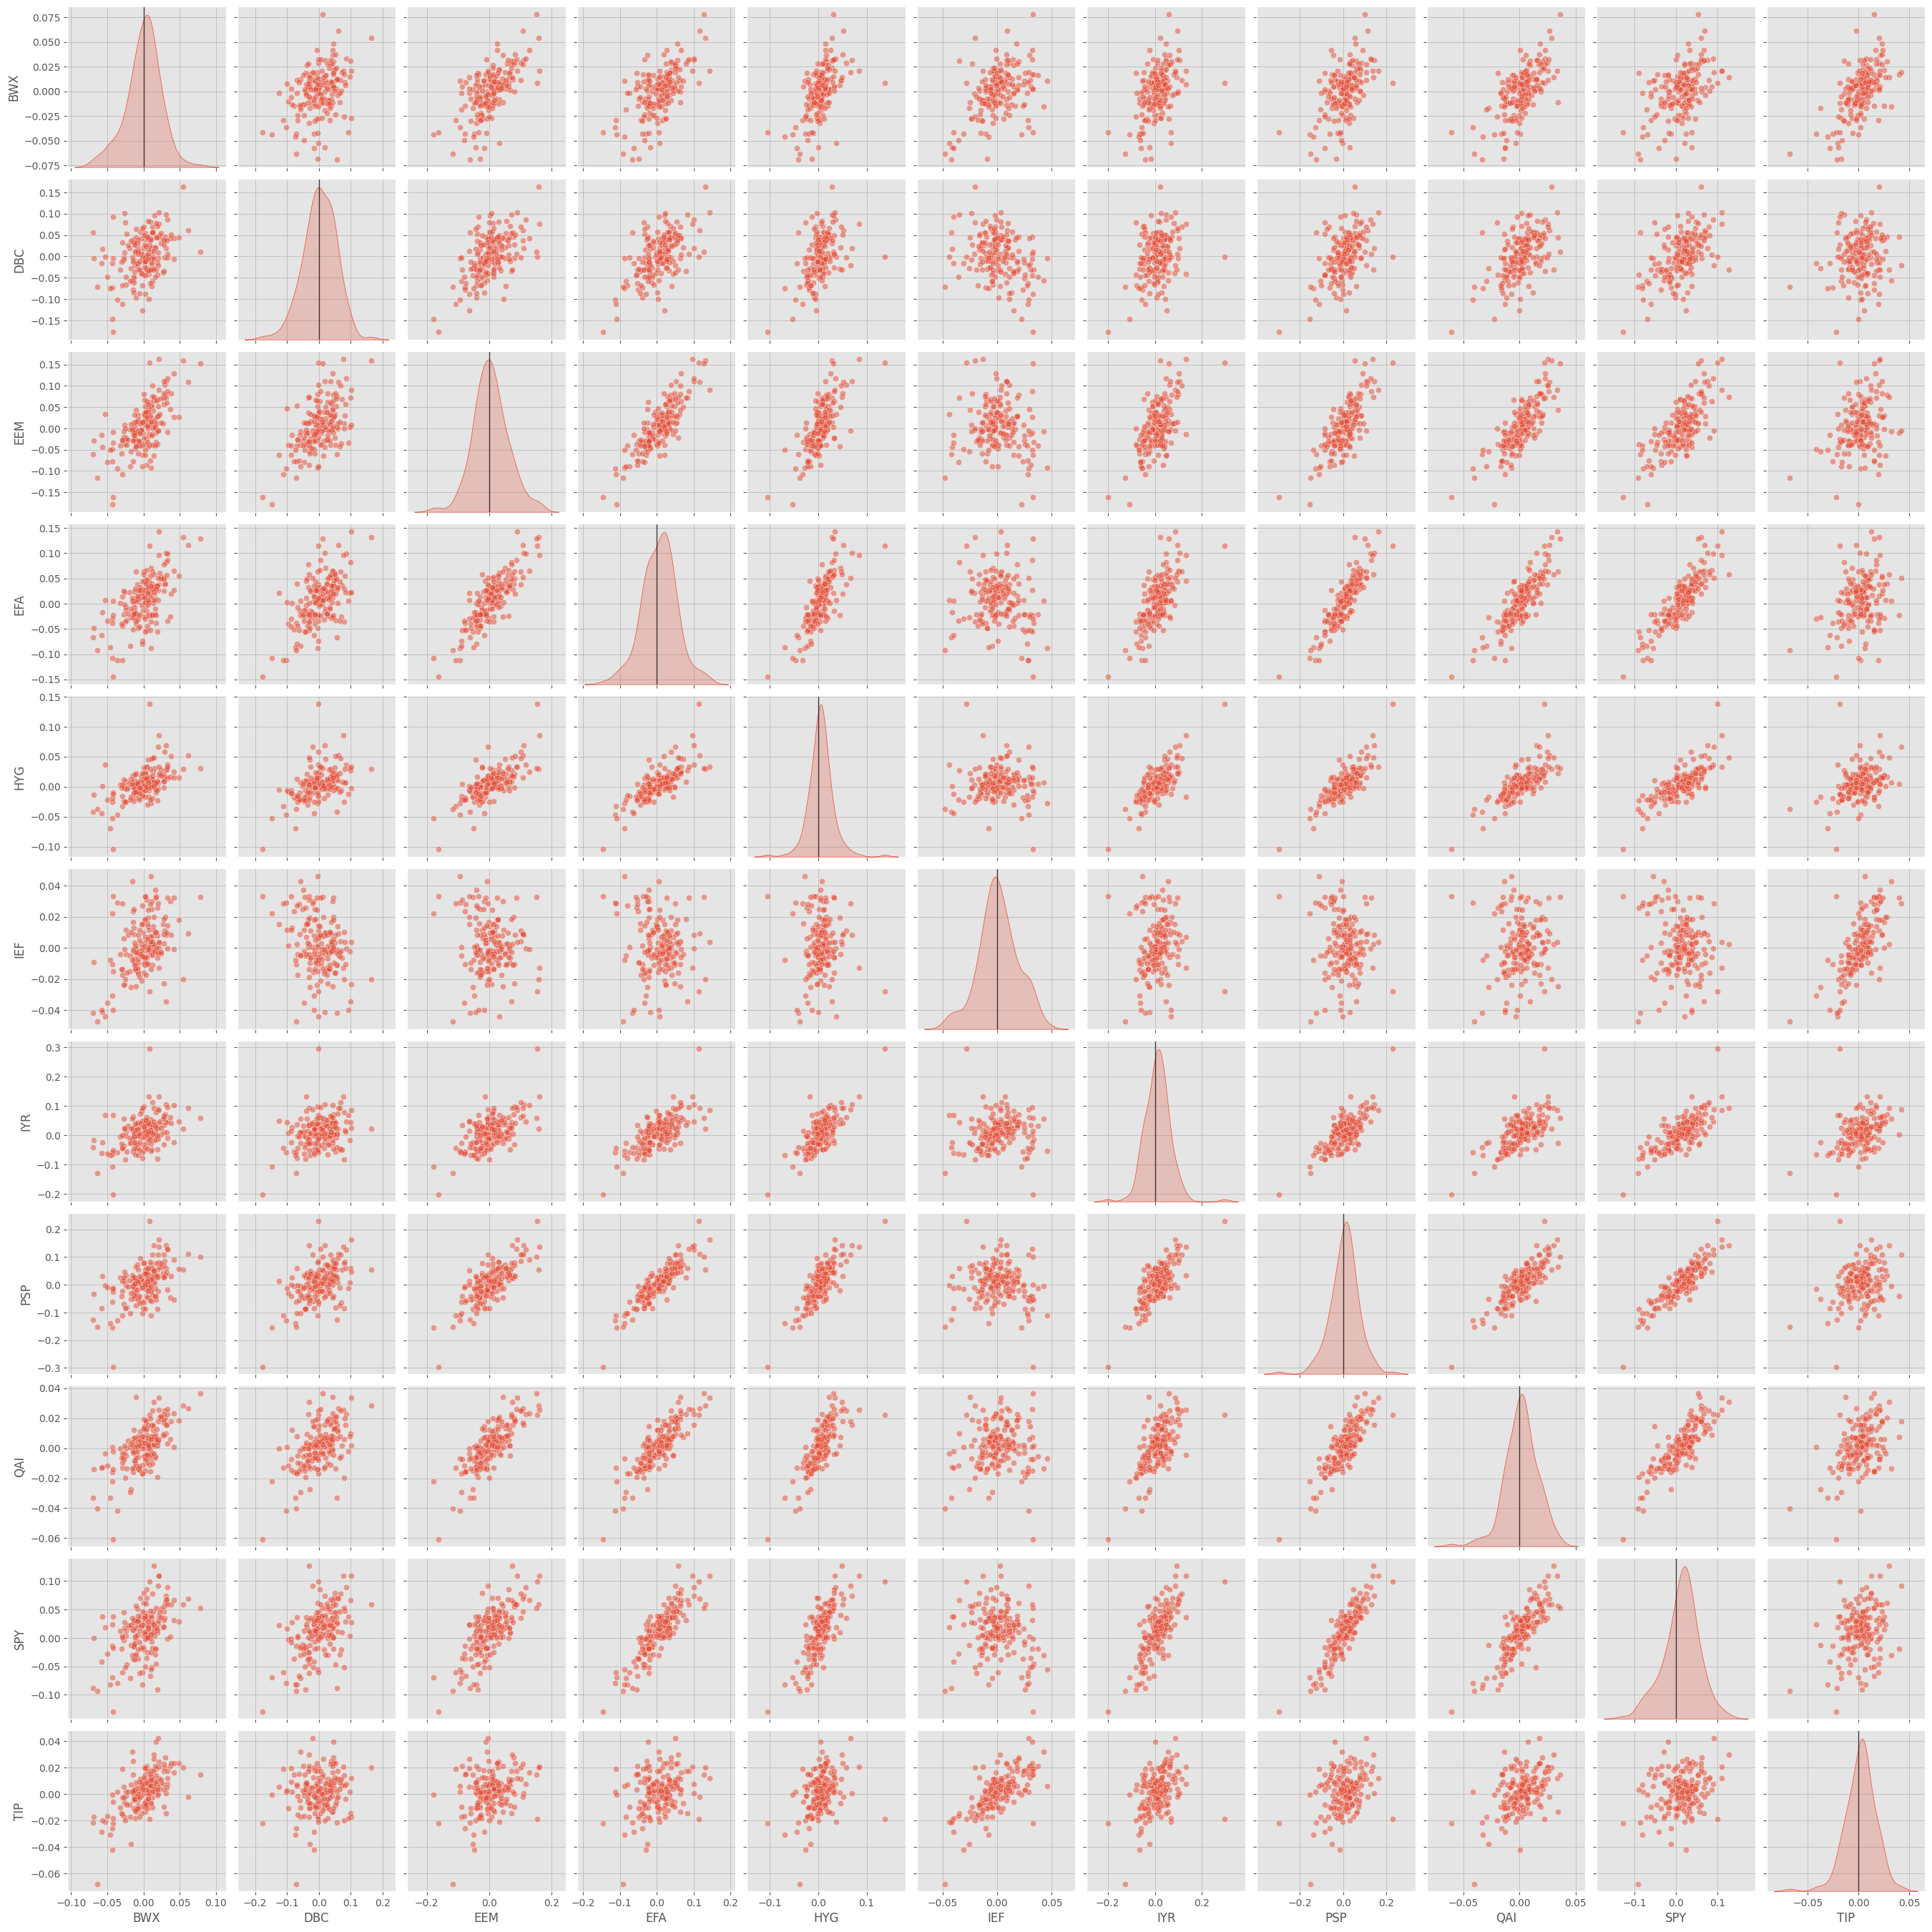

In [17]:
axes = sns.pairplot(etfs, diag_kind="kde", plot_kws={"alpha": 0.5})
for ax in axes.diag_axes:
    ax.axvline(0, c="k", lw=1, alpha=0.7)

### 2.1. Value at Risk and CVaR

Value at Risk (VaR) is a measure of the maximum loss that a portfolio can suffer over a given time horizon at a given confidence level. It is a measure of downside risk. In this class, we just use the quantile of the returns distribution. So: VaR(0.05) is the 5% quantile of the returns distribution.

Conditional Value at Risk (CVaR) is a measure of the expected loss given that the loss is greater than the VaR. It is a measure of the expected downside risk. In this class, we just use the mean of the returns that are less than the VaR. So: CVaR(0.05) is the mean of the returns that are less than the 5% quantile of the returns distribution.

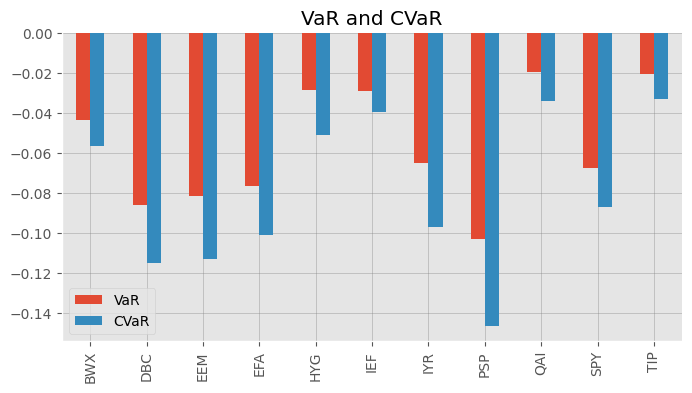

In [18]:
var = etfs.quantile(0.05).to_frame("VaR")
var["CVaR"] = etfs[etfs < etfs.quantile(0.05)].mean()
var.plot(kind="bar", figsize=(8, 4), title="VaR and CVaR");

### 2.2. Skewness and Kurtosis

Skewness is a measure of the asymmetry of a distribution. It is defined as:

$$
\frac{\mathbb{E}[(X - \mu)^3]}{\sigma^3}
$$

Kurtosis is a measure of the "tailedness" of a distribution. It is defined as:
$$
\frac{\mathbb{E}[(X - \mu)^4]}{\sigma^4}
$$

Note that:
- These are the third and fourth standardized moments of a distribution.
- The normal distribution has zero skewness and kurtosis of 3.
- Skewness measures the asymmetry of a distribution, and kurtosis measures the "tailedness" of a distribution.
- **Importantly**, pandas already measures excess kurtosis.

Lets dive deeper by looking at EFA.

Skewness: -0.07
Kurtosis (Excess): 0.67


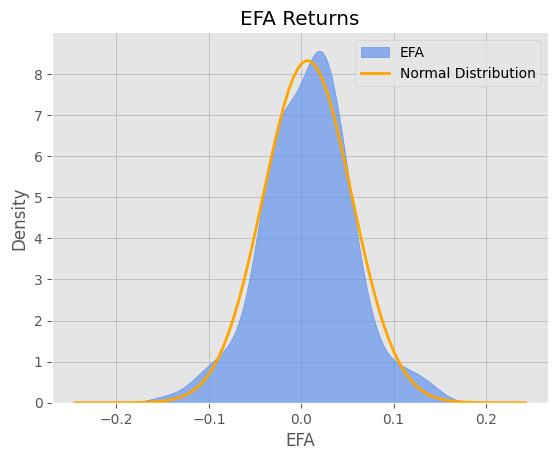

In [19]:
import scipy.stats as stats

efa = etfs[["EFA"]]

# Plot the smoothed KDE of the data
sns.kdeplot(efa["EFA"], shade=True, color="cornflowerblue", alpha=0.7, label="EFA")

# Plot a normal distribution with the same mean and standard deviation
x = np.linspace(efa["EFA"].min() - 0.1, efa["EFA"].max() + 0.1, 100)
y = stats.norm.pdf(x, loc=efa["EFA"].mean(), scale=efa["EFA"].std())
plt.plot(x, y, color="orange", lw=2, label="Normal Distribution")
plt.legend()
plt.title("EFA Returns");
print(f"Skewness: {stats.skew(efa['EFA']):.2f}")
print(f"Kurtosis (Excess): {stats.kurtosis(efa['EFA']):.2f}")

### 2.3. Maximum Drawdown

This is normally one of the more counterintuitive risk metrics. It is defined as: the maximum *percentage* loss that you can expect to suffer over the given time horizon. So, if my portfolio goes something like:

10, 1, 100, 15

Then my maximum drawdown is 90%. Why? Because although going from 100 to 15 is a 85% loss, it is not the maximum loss that I can expect to suffer. I can expect to suffer a 90% loss, because I can go from 10 to 1.

### 2.4. Market Beta, Information Ratio, and Treynor Ratio

Market beta:

$$
r_i = \alpha_i + \beta_i r_m + \epsilon_i
$$

In this class, we *only* use the linear market beta, ie. the coefficient that we get when we regress the returns of the asset on the returns of the market. This is a measure of the systematic risk of the asset.

Arguably more useful is the downside beta:

$$
r_i = \alpha_i + \beta_i^D r_m^D + \epsilon_i
$$

Which regresses the returns of the asset on the returns of the market, but only when the market is down. This is a measure of the systematic downside risk of the asset. Why might this be more useful in a hedge fund setting?

Information ratio:

$$
\mathit{IR} = \frac{\alpha}{\sqrt{\mathit{Var}(\epsilon)}}
$$

We can kind of intuit what this measures. $\alpha$ is the constant in the linear regression, so it measures the excess return of an asset. The standard deviation of $\epsilon$ measures how far off the linear line the asset is. So, a higher information ratio means that the asset has a consistently higher excess return, whereas a lower one either means negative excess return, or that the asset is very volatile.

Examples:

In [20]:
# Regress PSP on SPY
regr_3 = sm.OLS(etfs["PSP"], sm.add_constant(etfs["SPY"])).fit()
regr_downside = sm.OLS(etfs["PSP"][etfs["SPY"] < 0], sm.add_constant(etfs["SPY"][etfs["SPY"] < 0])).fit()

beta = regr_3.params["SPY"]
downside_beta = regr_downside.params["SPY"]
alpha = regr_3.params["const"]
information_ratio = (regr_3.params[0] / regr_3.resid.std()) * np.sqrt(12)

print(f"Beta: {beta:.2f}")
print(f"Downside Beta: {downside_beta:.2f}")
print(f"Alpha: {alpha:.4f}")
print(f"Information Ratio: {information_ratio:.2f}")

Beta: 1.38
Downside Beta: 1.54
Alpha: -0.0099
Information Ratio: -1.17


Can we connect what we just did in section 1 to how good these metrics are?

In [21]:
# As an example showing how information ratio can change.
spy = etfs["SPY"]

# Add tight gaussian noise + 0.001 to the returns.
asset_1 = spy + np.random.normal(0, 0.001, len(spy)) + 0.001
asset_2 = spy + np.random.normal(0, 0.2, len(spy)) + 0.1

# Regress and calculate information ratio.
regr_1 = sm.OLS(asset_1, sm.add_constant(spy)).fit()
regr_2 = sm.OLS(asset_2, sm.add_constant(spy)).fit()

ir_1 = (regr_1.params[0] / regr_1.resid.std()) * np.sqrt(12)
ir_2 = (regr_2.params[0] / regr_2.resid.std()) * np.sqrt(12)

# Calculate betas and downside betas
beta_1 = regr_1.params["SPY"]
beta_2 = regr_2.params["SPY"]
downside_beta_1 = sm.OLS(asset_1[spy < 0], sm.add_constant(spy[spy < 0])).fit().params["SPY"]
downside_beta_2 = sm.OLS(asset_2[spy < 0], sm.add_constant(spy[spy < 0])).fit().params["SPY"]

print(f"Beta 1: {beta_1:.2f}")
print(f"Beta 2: {beta_2:.2f}")

print(f"Downside Beta 1: {downside_beta_1:.2f}")
print(f"Downside Beta 2: {downside_beta_2:.2f}")

print(f"Information Ratio 1: {ir_1:.2f}")
print(f"Information Ratio 2: {ir_2:.2f}")

Beta 1: 1.00
Beta 2: 0.65
Downside Beta 1: 1.01
Downside Beta 2: -1.20
Information Ratio 1: 3.30
Information Ratio 2: 1.64


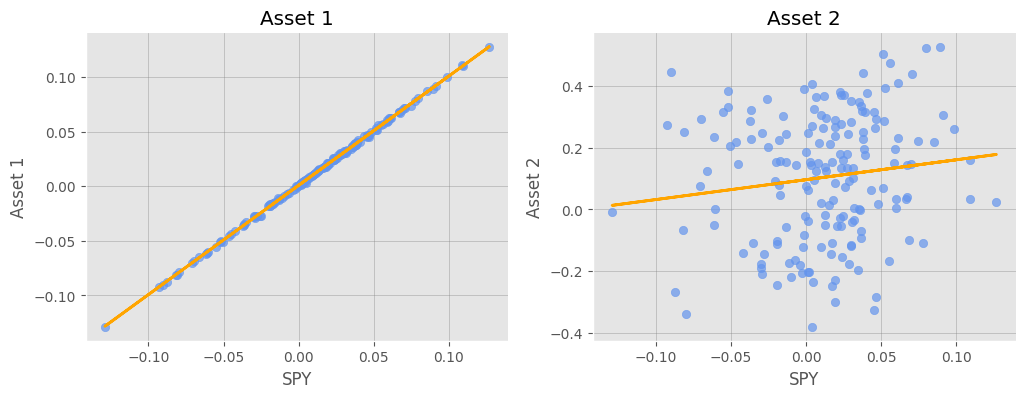

In [22]:
# And graphically
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(spy, asset_1, color="cornflowerblue", alpha=0.7)
axes[0].plot(spy, regr_1.predict(sm.add_constant(spy)), color="orange", lw=2)
axes[0].set_title("Asset 1")
axes[0].set_xlabel("SPY")
axes[0].set_ylabel("Asset 1")

axes[1].scatter(spy, asset_2, color="cornflowerblue", alpha=0.7)
axes[1].plot(spy, regr_2.predict(sm.add_constant(spy)), color="orange", lw=2)
axes[1].set_title("Asset 2")
axes[1].set_xlabel("SPY")
axes[1].set_ylabel("Asset 2");

Treynor Ratio:

$$
\mathit{TR} = \frac{\bar{r}}{\beta}
$$

Why is this useful? It gives us a measure of the excess return per unit of systematic risk. So consider:

In [23]:
# Calculate Treynor for previous 2 regr
treynor_1 = (asset_1.mean() / regr_1.params['SPY']) * np.sqrt(12)
treynor_2 = (asset_2.mean() / regr_2.params['SPY']) * np.sqrt(12)
print(f"Treynor 1: {treynor_1:.2f}")
print(f"Treynor 2: {treynor_2:.2f}")

Treynor 1: 0.04
Treynor 2: 0.56


## 3. Python Fun

### 3.1. Pandas

In [24]:
# Were it not for the fact that we're using a dictionary to store the summary
# parameters, we could save ourselves quite a bit of coding by using the .agg
# method. Suppose we have the following problem: we want to calculate the mean,
# standard deviation, and perhaps some more complex metrics for each column in the DataFrame.

def average_tuesday_returns(df):
    return df[df.index.day_name() == "Tuesday"].mean()

def var_05(df):
    return df.quantile(0.05)


def minimum_friday_returns(df):
    return df[df.index.day_name() == "Friday"].min()


def sharpe(df):
    return df.mean() / df.std()


# We could do this:
my_metrics = {}

my_metrics["mean"] = etfs.mean()
my_metrics["std"] = etfs.std()
my_metrics["sharpe"] = etfs.mean() / etfs.std()
my_metrics["average_tuesday_returns"] = average_tuesday_returns(etfs)
my_metrics["var_05"] = var_05(etfs)
my_metrics["minimum_friday_returns"] = minimum_friday_returns(etfs)

my_metrics = pd.DataFrame(my_metrics, index=etfs.columns)

# But this uses up a lot of code, and is not very friendly to read. We're
# essentially just mindlessly repeating the same code over and over again.

# We could do this instead:
my_metrics = etfs.agg(
    ["mean", "std", sharpe, average_tuesday_returns, var_05, minimum_friday_returns]
)
my_metrics = my_metrics.T
my_metrics

# Or, we can combine this with a variable, say we want one set of functions to
# calculate the risk metrics, and another to calculate the return metrics.

RETURN_METRICS = ["mean", "std", sharpe, average_tuesday_returns]
RISK_METRICS = [var_05, minimum_friday_returns]

my_metrics = etfs.agg(RETURN_METRICS + RISK_METRICS)

# Or (and this is worse than simply using + to join the lists), we can use iterator unpacking.
my_metrics = etfs.agg([*RETURN_METRICS, *RISK_METRICS])

# We can also use the .agg method to apply different functions to different columns.
# Suppose we want the mean for DBC, the average Tuesday returns for SPY, and the
# standard deviation for IEF.
my_metrics = etfs.agg({"DBC": "mean", "SPY": average_tuesday_returns, "IEF": "std"})

# Of course, remember to keep track of which operations you're doing to
# which asset.

### 3.2. Stop Repeating Yourself

In [25]:
# Here is another example of dictionary unpacking and where it can be useful.
# Recall from the calc_iterative_regression(y, X, intercept=True, one_to_many=False, adj=12) function,
# that we have 3 different parameters that we can set. Suppose that for *this* notebook in
# particular, we want to change all of them. However, we don't want to have to repeatedly call
# the function with different parameters, eg:
from utils import calc_iterative_regression

calc_iterative_regression(
    etfs[["IEF", "HYG", "PSP"]], etfs[["SPY"]], intercept=False, one_to_many=True, adj=52
)

# We can simply make a dictionary of the parameters we want to change, and then unpack it into
# the function.

PARAMS = {"intercept": False, "one_to_many": True, "adj": 52}

calc_iterative_regression(etfs[["IEF", "HYG", "PSP"]], etfs[["SPY"]], **PARAMS)

# We can also use something like functools.partial to *partially* apply the function with the
# parameters we want to change. This is useful if we want to change multiple parameters, perhaps
# in a more complex way, or by personal preference. This pre-applies the parameters we want to change,
# and returns a new function that we can call with the remaining parameters.

from functools import partial

calc_iterative_regression_partial = partial(
    calc_iterative_regression, intercept=False, one_to_many=True, adj=12
)

calc_iterative_regression_partial(etfs[["IEF", "HYG", "PSP"]], etfs[["SPY"]])

# When is functools.partial particularly useful? Think about how many times we've had to load in
# an excel sheet and parse the dates.

read_excel = partial(pd.read_excel, index_col=0, parse_dates=[0])
etfs = read_excel("finm-portfolio-2023/data/multi_asset_etf_data.xlsx", sheet_name="excess returns")

# Finally, note how we're constantly repeating etfs[["IEF", "HYG", "PSP"]] and etfs["SPY"] in the
# function calls! We could fix this with another partial function, but we can also use list unpacking.
VAR_LIST = [etfs[["IEF", "HYG", "PSP"]], etfs[["SPY"]]]

# This is what Python means when you see a function that looks like: func(*args, **kwargs)
# Note how we can end the line with a ';' to suppress the output of the function call.
calc_iterative_regression(*VAR_LIST, **PARAMS);

### 3.3. Make Your For-Loops Smarter

In [26]:
# Example 1: Calculating something from two lists of the same length.

tax_rate = [i / 10 for i in range(1, 11)]
income_rate = [i * 1000 for i in range(50, 61)]
tax_paid = []

# You might be tempted to do something like this:
for idx in range(len(tax_rate)):
    tax = tax_rate[idx] * income_rate[idx]
    tax_paid.append(tax)

# Or maybe you know what enumerate() does, and you do this:
for idx, rate in enumerate(tax_rate):
    tax = rate * income_rate[idx]
    tax_paid.append(tax)

# But, you can do this instead:
for rate, income in zip(tax_rate, income_rate):
    tax = rate * income
    tax_paid.append(tax)

# And finally, you can combine this into a list comprehension:
tax_paid = [rate * income for rate, income in zip(tax_rate, income_rate)]

In [27]:
# Example 2: Filtering directly. Suppose we want to filter out all negative numbers from a list.
my_list = [1, 2, 3, -1, -2, -3, 4, 5, 6, -4, -5, -6]

# List comprehension
my_list_filt = [i for i in my_list if i >= 0]

# But suppose you want to append the numbers to a new list, but you can't
# do that in a list comprehension.

my_list_filt = []

for i in my_list:
    if i >= 0:
        my_list_filt.append(i)

# This is somewhat better, but we can do even better with a filter() function.
# Note that this enables you to have some complex logic in the filter, without
# needing to write a bunch of if-else statements; eg.

for i in filter(lambda x: x >= 0, my_list):
    my_list_filt.append(i)


def my_filter(x):
    if x >= 0 and x % 2 == 0 and x < 5 and x != 3:
        return True
    return False


for i in filter(my_filter, my_list):
    my_list_filt.append(i)

# This is rarely used, but suppose you wanted to invert
# the logic of the complicated my_filter() function. You can use
# itertools.filterfalse() to do this.
from itertools import filterfalse

for i in filterfalse(my_filter, my_list):
    my_list_filt.append(i)

In [28]:
# Example 3: Using previous/next values without having to use indices.
my_list = [i for i in range(10)]

# Suppose we want to calculate the difference between each value and the next value.
# We could do this:
diffs = []
for idx in range(len(my_list) - 1):
    diff = my_list[idx + 1] - my_list[idx]
    diffs.append(diff)

# Or maybe something that uses enumerate():
for idx, val in enumerate(my_list[:-1]):
    diff = my_list[idx + 1] - val
    diffs.append(diff)

# Or we could use zip():
for val, next_val in zip(my_list[:-1], my_list[1:]):
    diff = next_val - val
    diffs.append(diff)

# But we could just save ourselves the trouble and use the itertools module!
# This is VERY useful when dealing with, for example, time series data.
from itertools import pairwise

for val, next_val in pairwise(my_list):
    diff = next_val - val
    diffs.append(diff)

# Of course, if this was a job interview and you wanted to show off, do:
diffs = list(map(lambda x: x[0] - x[1], pairwise(my_list)))

In [29]:
# Example 4: Itertools module.

# Count, cycle, repeat
# Goal: [1, 2, 3, 4] -> [1, 2, 3, 4, 1, 2, 3, 4, ...]

# Works for lists, but what if our input is more complicated?
l_repeat = [1, 2, 3, 4] * 5


from itertools import cycle, repeat


def repeat_list(l, n):
    return list(repeat(l, n))


def cycle_list(l, n):
    return list(cycle(l))

# Infinite counter:
# Goal: [10, 15, 20]
from itertools import count

# Solution 1:
i = 10
while True:
    print(i)
    i += 5
    break

# Solution 2:
for i in count(10, 5):
    print(i)
    break

10
10


In [30]:
# product, permutations, combinations
a = [1, 2, 3]

# Solution 1:
for i in range(len(a)):
    for j in range(i + 1, len(a)):
        print(a[i], a[j])


# Solution 2:
from itertools import combinations

for i, j in combinations(a, 2):
    print(i, j)

# Cartesian product:
# Solution 1:
for i in a:
    for j in a:
        print(i, j)

# Solution 2:
from itertools import product

for i, j in product(a, a):
    print(i, j)


# Permutations:
# Solution 1:
for i in a:
    for j in a:
        if i != j:
            print(i, j)

# Solution 2:
from itertools import permutations

for i, j in permutations(a, 2):
    print(i, j)

1 2
1 3
2 3
1 2
1 3
2 3
1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3
1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3
1 2
1 3
2 1
2 3
3 1
3 2
1 2
1 3
2 1
2 3
3 1
3 2


In [31]:
# Chain and chain.from_iterable
# GOAL: [[1, 2, 3], [4, 5, 6]] -> [1, 2, 3, 4, 5, 6]
ll = [[1, 2, 3], [4, 5, 6]]
# Solution 1:
new_l = []
for l in ll:
    for i in l:
        new_l.append(i)

# Solution 2:
from itertools import chain

new_l = []
for i in chain(*ll):
    new_l.append(i)

# Solution 3:
new_l = list(chain.from_iterable(ll))

In [32]:
# Dropwhile and takewhile
# GOAL: [1, 2, 3, 4, 5, 6] -> [1, 2, 3]
l = [1, 2, 3, 4, 5, 6]

# Solution 1:
new_l = []
for i in l:
    if i < 4:
        new_l.append(i)
    else:
        break

# Solution 2:
from itertools import takewhile

new_l = list(takewhile(lambda x: x < 4, l))

# Solution 3:
from itertools import dropwhile

new_l = list(dropwhile(lambda x: x >= 4, l))